In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
sys.path.insert(0, '../src')
from game_xg import RocketLeagueGame

In [2]:
game_id = "340f8aca-7dbd-43be-92f9-100d31c3e887"
rg = RocketLeagueGame(token=os.environ['TOKEN'], game_id=game_id, write_file=False)

Found bot not in bot list
Found bot not in bot list
Could not find field_of_view in camera settings for WavyTony
Could not find height in camera settings for WavyTony
Could not find pitch in camera settings for WavyTony
Could not find distance in camera settings for WavyTony
Could not find stiffness in camera settings for WavyTony
Could not find swivel_speed in camera settings for WavyTony
Could not find transition_speed in camera settings for WavyTony
Dropping these columns[('WavyTony', 'handbrake')]
The player never hit the ball during the "carry"
The player never hit the ball during the "carry"


   frame   time   goal  is_orange  distanceToGoal   ball_pos_x   ball_pos_y  \
0   2195   84.0  False          0     3046.011301 -3777.959961  4153.850098   
1   2830  111.0  False          0     5194.074222 -3321.969971   547.280029   
2   4953  199.0  False          1     8647.825832  1267.790039 -3499.830078   
3   5522  224.0  False          0     5159.830441 -1911.369995    81.059998   
4   6482  264.0  False          0      781.053152 -1458.849976  4598.479980   
5  12822  523.0  False          0     6905.507266  2606.459961  -811.369995   
6  13047  532.0  False          0     1480.224470   508.510010  4672.649902   
7  13331  544.0  False          0     1911.978134   841.380005  4341.770020   
8  13687  559.0   True          1     1714.468260  -785.609985  4805.950195   

   ball_pos_z    ball_vel_x    ball_vel_y  ...  opp_2_rot_z  opp_2_ball_cam  \
0  726.719971   8073.900146   7827.899780  ...     0.000194            True   
1  290.859985  13364.000244  21530.900879  ...     

In [3]:
game_df = rg.xg_data.copy()
game_df.head()

,shot_taker_name,is_orange,time,xg,goal
0,enpitsu,0,84.0,0.011824,False
1,enpitsu,0,111.0,0.086975,False
2,X_no_Z,1,199.0,0.028218,False
3,WavyTony,0,224.0,0.026341,False
4,enpitsu,0,264.0,0.193913,False


In [4]:
game_df.loc[-1] = {'time': 0, 'is_orange': None, 'xg': 0, 'shot_taker_name': '-', 'goal': 0}
game_df.index += 1
game_df.sort_index(inplace=True)
game_df.loc[len(game_df)] = {'time': max(300, game_df['time'].max()), 'is_orange': None, 'xg': 0, 'shot_taker_name': '-', 'goal': False}
orange_xg_sum = game_df[game_df['is_orange']==1]['xg'].cumsum()
game_df['orange_xg_sum'] = orange_xg_sum
blue_xg_sum = game_df[game_df['is_orange']==0]['xg'].cumsum()
game_df['blue_xg_sum'] = blue_xg_sum
game_df.fillna(method='ffill', inplace=True)
game_df.fillna(value=0, inplace=True)

In [5]:
game_df

,shot_taker_name,is_orange,time,xg,goal,orange_xg_sum,blue_xg_sum
0,-,0.0,0.0,0.000000,0,0.000000,0.000000
1,enpitsu,0.0,84.0,0.011824,0,0.000000,0.011824
2,enpitsu,0.0,111.0,0.086975,0,0.000000,0.098799
3,X_no_Z,1.0,199.0,0.028218,0,0.028218,0.098799
4,WavyTony,0.0,224.0,0.026341,0,0.028218,0.125140
5,enpitsu,0.0,264.0,0.193913,0,0.028218,0.319053
6,enpitsu,0.0,523.0,0.087483,0,0.028218,0.406536
7,enpitsu,0.0,532.0,0.710263,0,0.028218,1.116799
8,enpitsu,0.0,544.0,0.608467,0,0.028218,1.725266
9,X_no_Z,1.0,559.0,0.625306,1,0.653524,1.725266


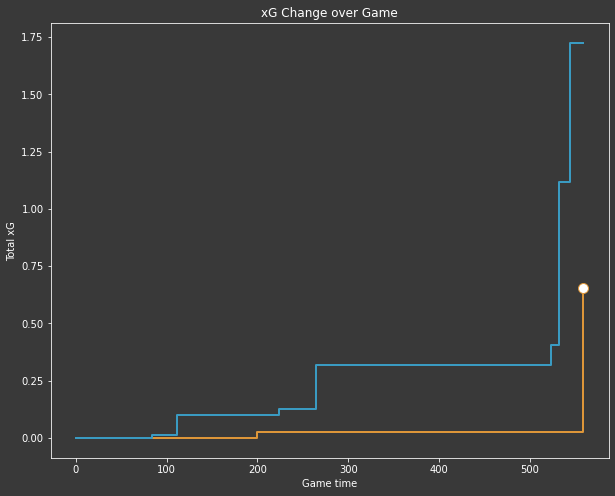

In [6]:
with plt.rc_context({
    'axes.edgecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#393939',
    'axes.labelcolor': 'white',
    'axes.facecolor': '#393939',
    }):
    fig, ax = plt.subplots(figsize=(10,8))
    # ax.set_facecolor('gray')
    # fig.set_facecolor('gray')
    game_df.plot(drawstyle='steps-post', x='time', y='orange_xg_sum', linewidth=2, c='#DD9639', ax=ax, legend=False, zorder=0)
    game_df.plot(drawstyle='steps-post', x='time', y='blue_xg_sum', linewidth=2, c='#3A9BC2', ax=ax, legend=False, zorder=0)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==1)].reset_index().plot.scatter(x='time', y='orange_xg_sum', ax=ax, edgecolor='#DD9639', s=100, c='white', zorder=1)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==0)].reset_index().plot.scatter(x='time', y='blue_xg_sum', ax=ax, edgecolor='#3A9BC2', s=100, c='white', zorder=1)
    plt.title("xG Change over Game", color='white')
    plt.ylabel("Total xG")
    plt.xlabel("Game time")
    

In [7]:
pd.DataFrame(game_df[game_df['shot_taker_name'] != "-"].groupby('shot_taker_name').agg({'xg': 'sum', 'goal': 'sum', 'is_orange': 'first'})).sort_values(by=['is_orange', 'xg'], ascending=[True, False]).rename(columns={'is_orange': 'team (orange)'})

,xg,goal,team (orange)
shot_taker_name,,,
enpitsu,1.698925,0,0.0
WavyTony,0.026341,0,0.0
X_no_Z,0.653524,1,1.0


In [8]:
# We lost this game 0-1, xG was 1.72 - 0.65